# **House Pricing Prediction Using Regression**
> Name : Lee Hui Hui


> Matric number : 22004798/1


> Occurence : Occ 2


> Lecturer : Muhammad Shahreeza Safiruz Bin Kassim

# **Import libraries**

In [499]:
# Import libraries
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Model building
from sklearn.linear_model import LinearRegression

# Model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve


# **Data analysis**

Load dataset

In [500]:
# Load dataset into a pandas dataframe
data = pd.read_csv('House Pricing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Data inspection

In [501]:
# Check the shape of the data
# Find the number of rows and columns in dataset
print('Shape of the data:',data.shape)

Shape of the data: (545, 13)


In [502]:
# Show list of columns name of dataset
print('List of columns name: {}'.format(data.columns))

List of columns name: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [503]:
# Show summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [504]:
# Check the summary statistics of the data
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [505]:
# Unique values in dataset
data.nunique().sort_values(ascending=False)

area                284
price               219
bedrooms              6
bathrooms             4
stories               4
parking               4
furnishingstatus      3
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
dtype: int64

In [506]:
for col in data.columns:
    print('Unique values in {} column are:'.format(col))
    print(data[col].unique())

Unique values in price column are:
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  49560

In [507]:
# Print first 5 rows of data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Correlation map

In [508]:
# Correlation map
# Correlation between various features in the dataset
# Find correlation between all data columns
correlation = data.corr()
correlation

<ipython-input-508-4fe279b6f7c6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


Construct a heatmap

<Axes: >

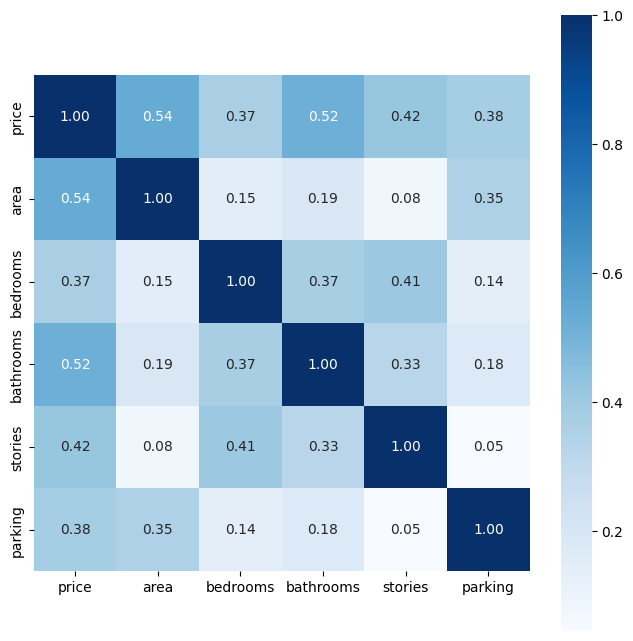

In [509]:
# Construct a heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Blues')

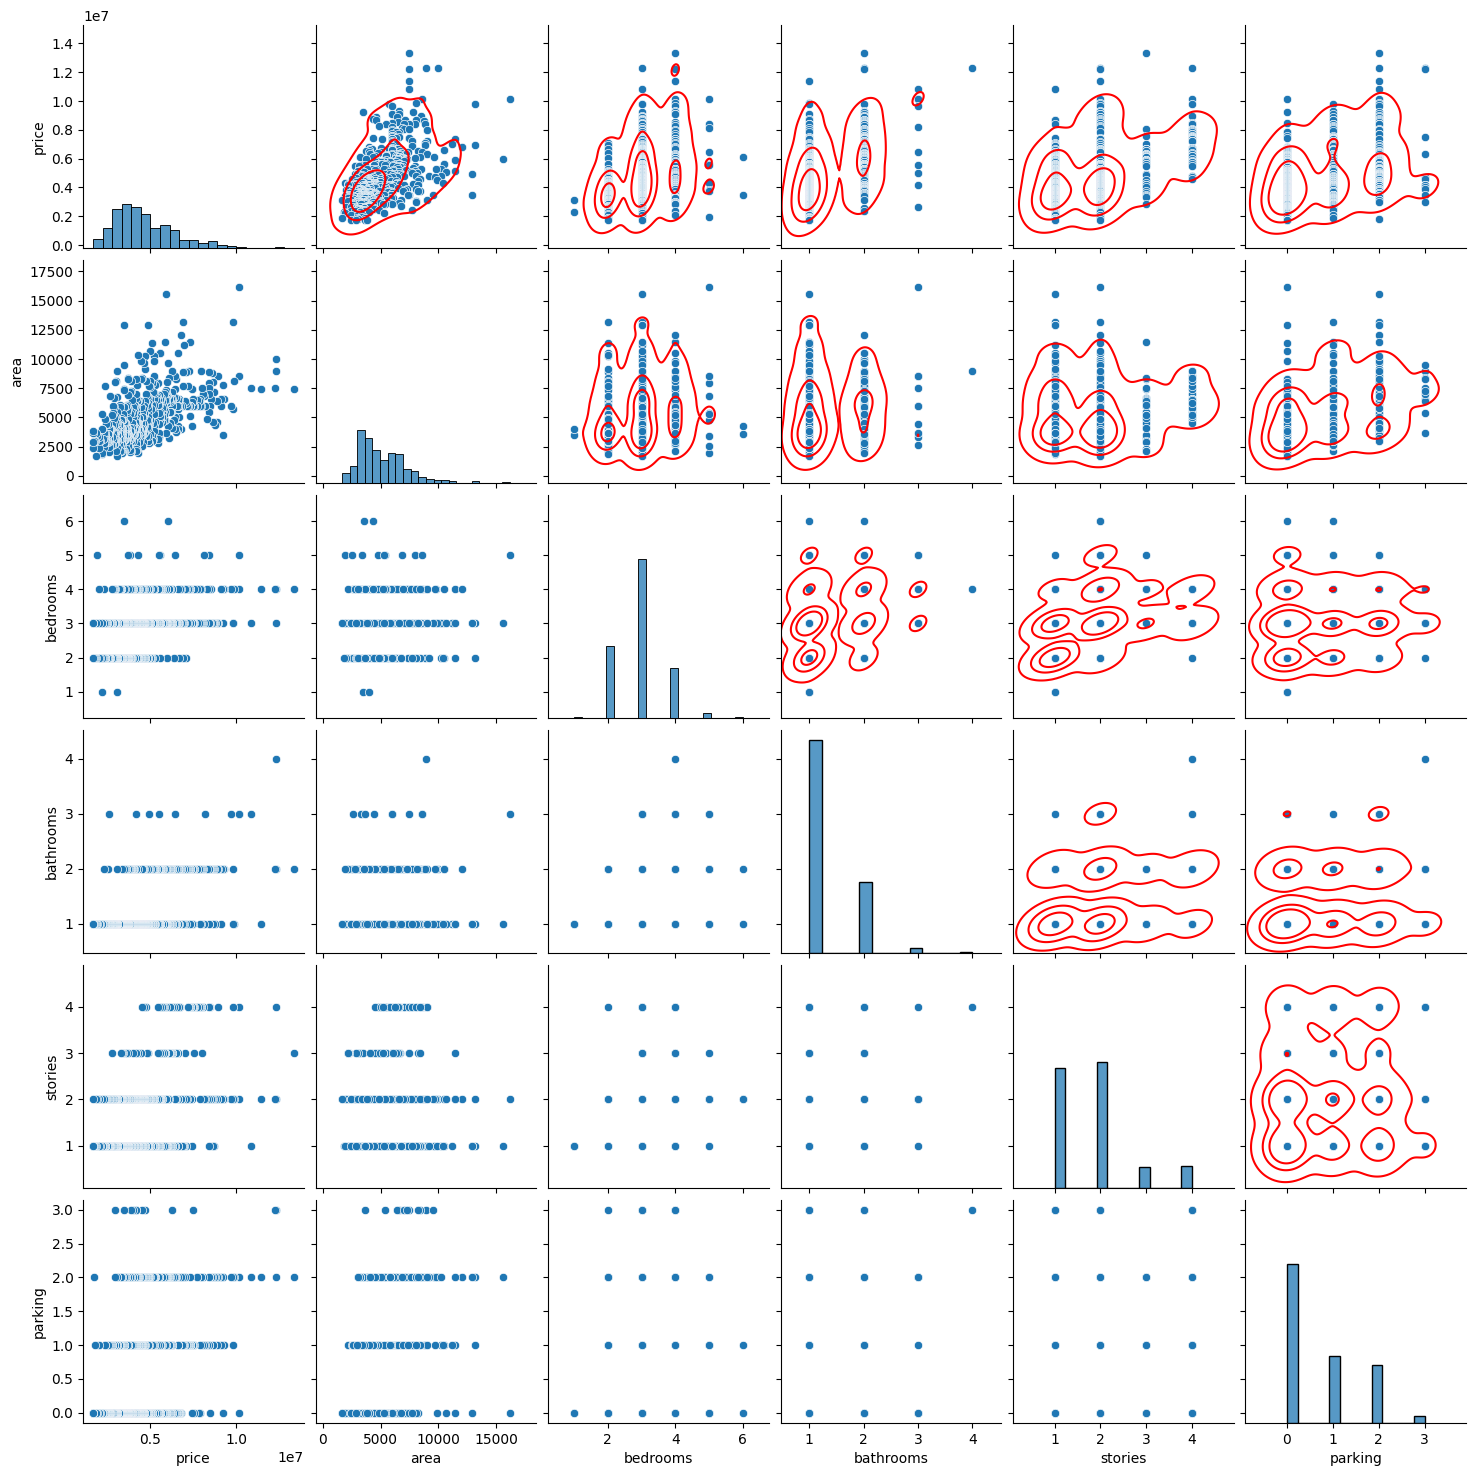

In [510]:
# Pairwise relationships between variables of dataset
# Kernel density estimate (KDE) visualize the distribution of a variable or the relationship between two variables in a pairwise manner
sns.pairplot(data).map_upper(sns.kdeplot, levels=4, color="red")

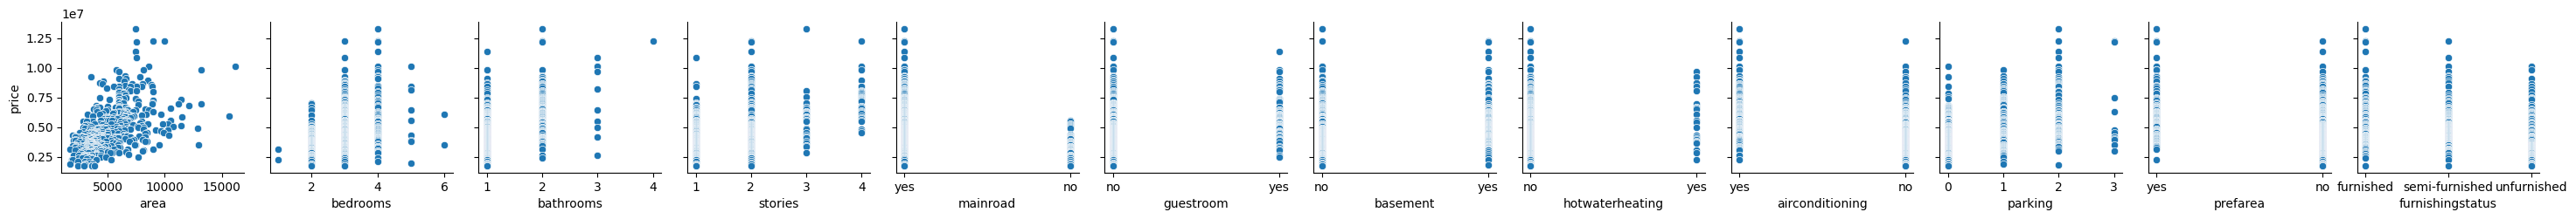

In [511]:
# Visualize the relationships between features and target variable
sns.pairplot(data, x_vars=data.drop(['price'], axis=1).columns, y_vars=['price'])
plt.show()

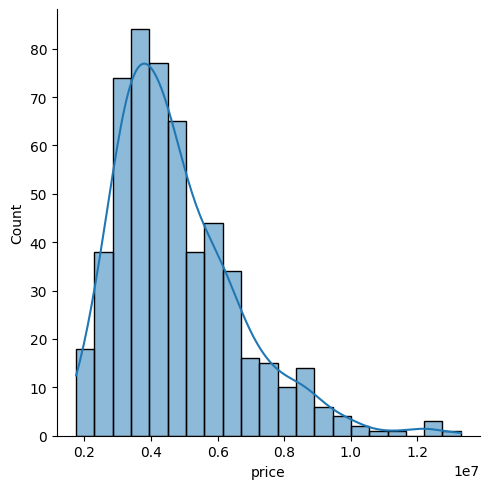

In [512]:
# Analyse distribution of the target variable (Price)
sns.displot(data['price'], kde=True)
plt.show()
#The mode is at the fourth box

Identify outlier

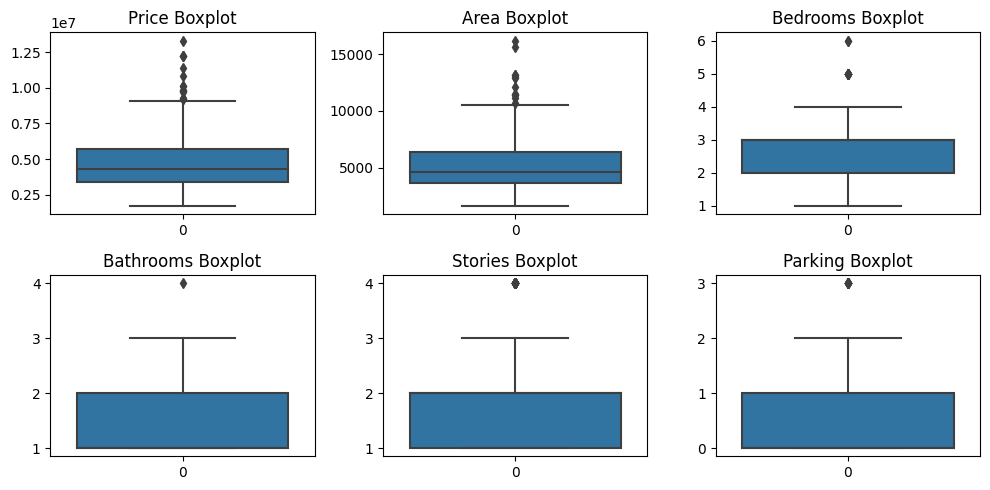

In [513]:
# Identify Outlier
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1.set_title("Price Boxplot")
plt2.set_title("Area Boxplot")
plt3.set_title("Bedrooms Boxplot")

plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
plt1.set_title("Bathrooms Boxplot")
plt2.set_title("Stories Boxplot")
plt3.set_title("Parking Boxplot")

plt.tight_layout() #adjusts the subplots to fit within the figure and eliminates any overlapping
#We can see that price and area have noticeable outliers

# **Data preprocessing**

**Data cleaning**

Check for missing values

In [514]:
# Check if dataset contains null values
print('\033[1mNumber of missing values:\033[0m')
data.isnull().sum()

Number of missing values:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Check for duplicates

In [515]:
# Check if dataset contains duplicate rows
duplicates = data.duplicated()

# Count the number of duplicates
num_duplicates = sum(duplicates)

if num_duplicates > 0:
    # Remove duplicate rows
    data.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


Remove outliers

In [516]:
# Outlier Treatment
# Price and area have considerable outliers.

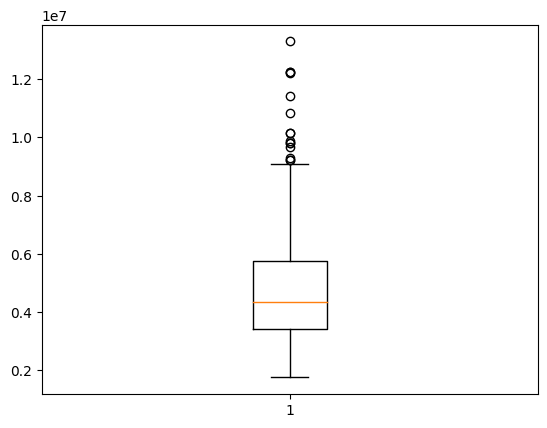

In [517]:
# Outlier treatment for price
# Calculate min and max
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

#Remove outliers
data = data[ (data['price'] >= min) & (data['price'] <= max) ]

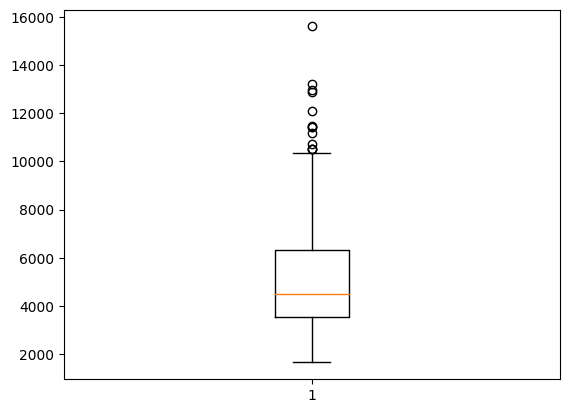

In [518]:
# Outlier treatment for area
# Calculate min and max
plt.boxplot(data['area'])
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

#Remove outliers
data = data[ (data['area'] >= min) & (data['area'] <= max) ]

In [519]:
# Check shape after removal of outlier
print('Number of rows (samples) and columns remaining in the dataset after removing the outliers:', data.shape)
data.head()

Number of rows (samples) and columns remaining in the dataset after removing the outliers: (517, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [520]:
# Reset index
# After removing outliers, it's possible that the index out of shape
data=data.reset_index(drop=True)

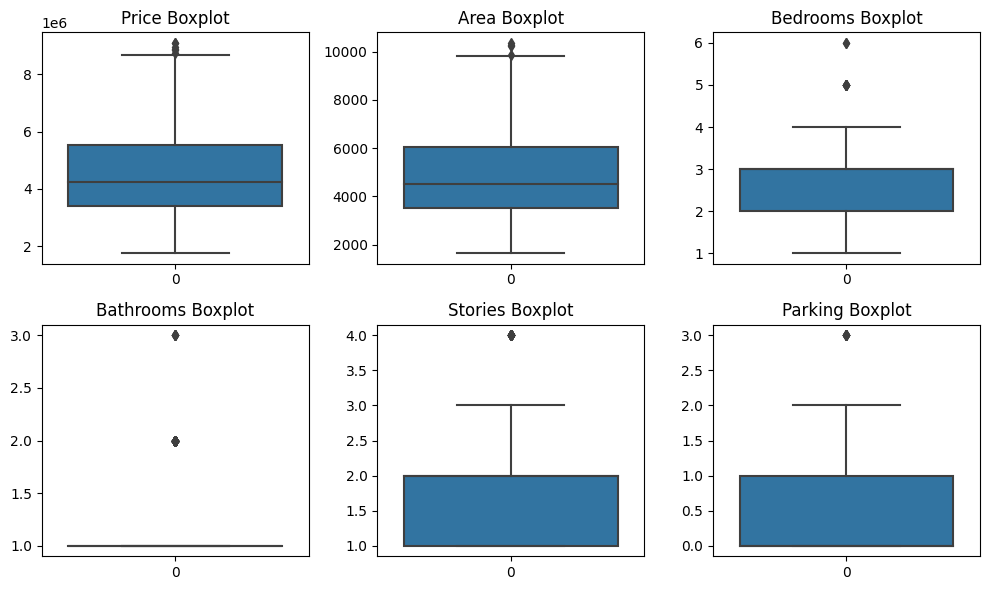

In [521]:
# Check again the outliers through Boxplot
fig, axs = plt.subplots(2,3, figsize = (10,6))

plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1.set_title("Price Boxplot")
plt2.set_title("Area Boxplot")
plt3.set_title("Bedrooms Boxplot")

plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
plt1.set_title("Bathrooms Boxplot")
plt2.set_title("Stories Boxplot")
plt3.set_title("Parking Boxplot")

plt.tight_layout() 

Categorical Features Encoding

In [522]:
# Encode "yes" to 1, "no" to 0
vars = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
data[vars] = data[vars].replace({'yes':1, 'no':0})

In [523]:
# Encode "furnishingstatus" using Dummy Encoding
status = pd.get_dummies(data['furnishingstatus'])
status.head(10)

,furnished,semi-furnished,unfurnished
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


In [524]:
# Only two columns are needed, "furnished" column can be dropped
# 00 -- furnished
# 01 -- unfurnised
# 10 -- semi-furnished
status = pd.get_dummies(data['furnishingstatus'], drop_first=True)
status.head(10)


,semi-furnished,unfurnished
0,1,0
1,0,1
2,0,0
3,0,0
4,1,0
5,1,0
6,0,1
7,0,0
8,0,0
9,0,0


In [525]:
# Drop the "frunishingstatus" in original datasets
data.drop("furnishingstatus", inplace=True, axis=1)

# Concatenate the dummy variables with the original datasets
data = pd.concat( [data, status], axis=1 )
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
5,8750000,4320,3,1,2,1,0,1,1,0,2,0,1,0
6,8680000,7155,3,2,1,1,1,1,0,1,2,0,0,1
7,8645000,8050,3,1,1,1,1,1,0,1,1,0,0,0
8,8645000,4560,3,2,2,1,1,1,0,1,1,0,0,0
9,8575000,8800,3,2,2,1,0,0,0,1,2,0,0,0


In [526]:
data.shape

(517, 14)

Feature Scaling (Normalization) before data splitting


> Rescale the data to range [ 0-1 ]



In [527]:
# Normalization using MinMaxScaler()
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [528]:
# Display datasets after Normalization
print('\033[1mNormalization on datasets\033[0m'.center(200))
display(data_normalized.head())

                                                                                   Normalization on datasets                                                                                    


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.499426,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0,0.0
1,1.000000,0.568312,0.6,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.0,1.0
2,0.980952,0.786452,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0
3,0.971429,0.338691,0.4,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0
4,0.966667,0.547646,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0


In [529]:
display(data_normalized.describe())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.383520,0.371999,0.388395,0.130561,0.264990,0.851064,0.177950,0.346228,0.042553,0.307544,0.217924,0.216634,0.415861,0.338491
std,0.216983,0.204268,0.146340,0.232684,0.288402,0.356370,0.382841,0.476228,0.202043,0.461923,0.281127,0.412350,0.493347,0.473655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223810,0.214696,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.327210,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.505166,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [530]:
data_normalized.to_csv('cleaned_data_house.csv', index=False)

Split dataset into training sets and testing sets

In [531]:
# Split data into training and testing sets
x = data_normalized.drop(['price'],axis=1)
y = data_normalized['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.reset_index(drop=True, inplace=True)

print('                  x sets    y sets')
print('Original set:   ',x.shape, y.shape)
print('Training set:   ',x_train.shape, y_train.shape)
print('Testing set :   ',x_test.shape, y_test.shape)

                  x sets    y sets
Original set:    (517, 13) (517,)
Training set:    (361, 13) (361,)
Testing set :    (156, 13) (156,)


                                                                             Correlation Matrix                                                                             


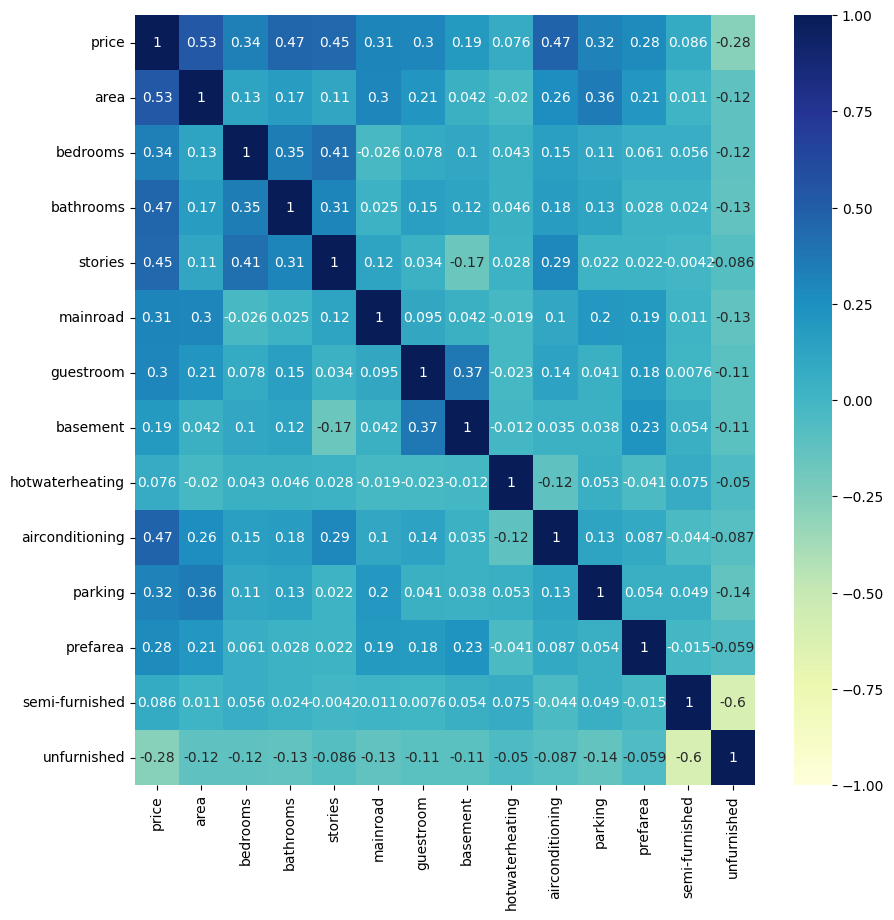

In [532]:
# Check correlation map
print('\033[1mCorrelation Matrix\033[0m'.center(180))
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()


# **Model Development**

Linear Regression

In [533]:
# Fit linear regression to the training set
LR = LinearRegression().fit(x_train,y_train)

pred1 = LR.predict(x_train) 
pred2 = LR.predict(x_test) 

# **Model Evaluation**

Display Coefficient and Intercept

In [534]:
#Check coefficient 
print("Coefficient: \n",LR.coef_)

#Check intercept
print("Intercept: \n",LR.intercept_)

Coefficient: 
 [ 0.27896894  0.07095886  0.19395422  0.17610498  0.05204177  0.05937025
  0.04366858  0.08494816  0.11419642  0.0985823   0.06607403 -0.00107411
 -0.03524903]
Intercept: 
 0.04420808070763882


Check Accuracy of Prediction

In [535]:
#Check evaluation metrices for training set
mse = mean_squared_error(y_train, pred1)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - pred1))
r2 = r2_score(y_train, pred1)
rss = np.sum(np.square(y_train-pred1))

print( '{} \033[1mTraining Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on training set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on training set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on training set     :',round(mae,15) )
print('R2-Score on training set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on training set :',round(rss,15) )
print()


                         Training Set Metrics                         
Mean Squared Error (MSE) on training set      : 0.015930860058791
Root Mean Squared Error (RMSE) on training set: 0.12621751090396
Mean Absolute Error (MAE) on training set     : 0.095272680214766
R2-Score on training set                      : 0.633740768295456
Residual Sum of Squares (RSS) on training set : 5.751040481223632



In [536]:
#Check evaluation metrices for testing set
mse = mean_squared_error(y_test, pred2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - pred2))
r2 = r2_score(y_test, pred2)
rss = np.sum(np.square(y_test-pred2))

print( '{} \033[1mTesting Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on testing set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on testing set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on testing set     :',round(mae,15) )
print('R2-Score on testing set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on testing set :',round(rss,15) )
print()

                         Testing Set Metrics                         
Mean Squared Error (MSE) on testing set      : 0.015840457247998
Root Mean Squared Error (RMSE) on testing set: 0.125858878304227
Mean Absolute Error (MAE) on testing set     : 0.094233057146956
R2-Score on testing set                      : 0.71012268320652
Residual Sum of Squares (RSS) on testing set : 2.471111330687722



Result visualization


y_Pred1 = Prediction using x training datasets



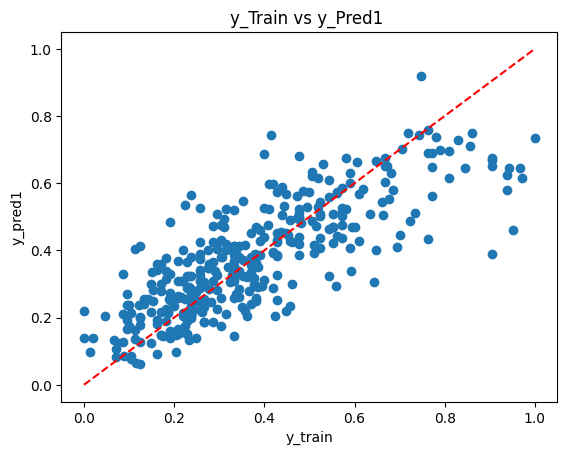


y_Pred2 = Prediction using x testing datasets



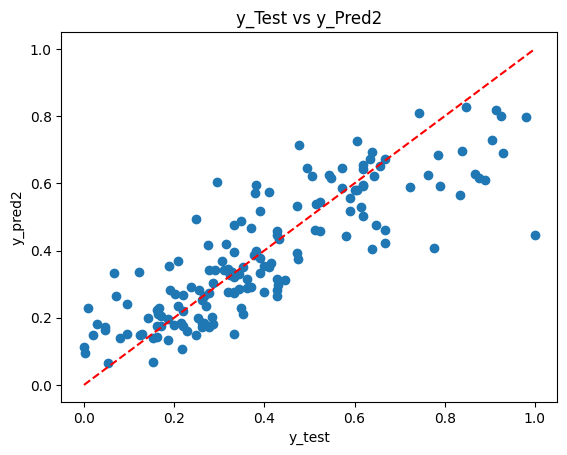

In [537]:
print("\n\033[1my_Pred1 = Prediction using x training datasets\033[0m\n")
plt.scatter(y_train,pred1)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.title('y_Train vs y_Pred1 ')         
plt.xlabel('y_train')                       
plt.ylabel('y_pred1')                       
plt.show()

print("\n\033[1my_Pred2 = Prediction using x testing datasets\033[0m\n")
plt.scatter(y_test,pred2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.title('y_Test vs y_Pred2')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred2')                       
plt.show()


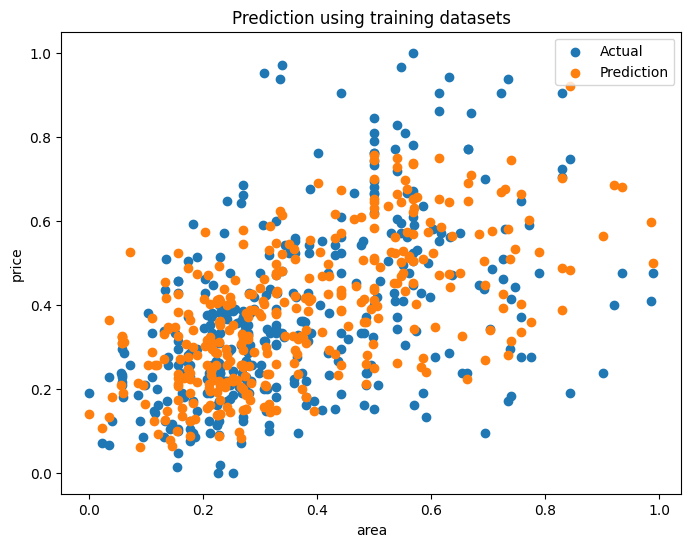

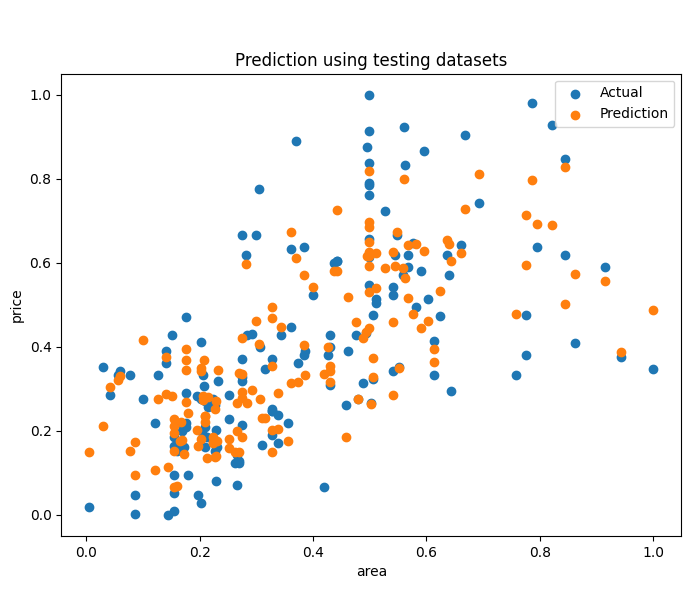

In [538]:
# Actual vs Prediction Scatter Plot

plt.figure(figsize=[8,6])
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= x_train['area'], label='Actual')
plt.scatter(y=pred1, x= x_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.title('\n\nPrediction using testing datasets')
plt.scatter(y= y_test, x= x_test['area'], label='Actual')
plt.scatter(y= pred2, x= x_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

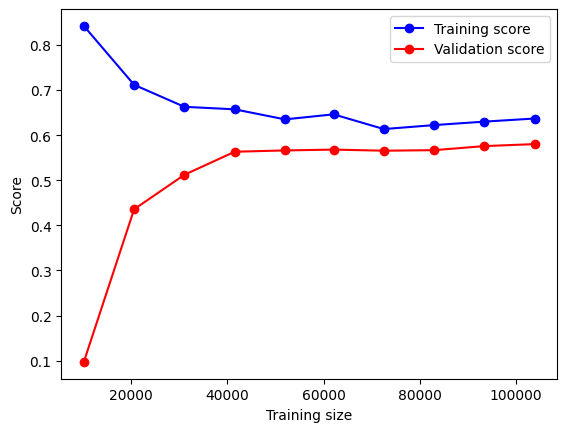

In [539]:
# Learning curve - to detect overfitting and underfitting
train_sizes, train_scores, test_scores = learning_curve(estimator=LR, X=x_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_sizes_abs = np.round(train_sizes * len(x_train))

plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), 'bo-', label='Training score')
plt.plot(train_sizes_abs, np.mean(test_scores, axis=1), 'ro-', label='Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

Hyperparameter tunning

Lasso Regression (L1 Regularization)

In [540]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
# Declare L1 for Lasso model
L1 = linear_model.Lasso()

# Define the hyperparameters to tune
params = {'alpha': [0.00001,0.0001,0.001,0.01, 0.1, 1, 10,100]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(L1, params, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the model
best_params = grid_search.best_params_
L1.set_params(**best_params).fit(x_train, y_train)

# Evaluate the model on the test set and train set
y_pred = L1.predict(x_train)
y_pred2 = L1.predict(x_test)


In [541]:
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - y_pred))
r2 = r2_score(y_train, y_pred)
rss = np.sum(np.square(y_train-y_pred))

print(f'\nBest hyperparameters:',best_params)
print( '{} \033[1mTraining Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on training set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on training set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on training set     :',round(mae,15) )
print('R2-Score on training set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on training set :',round(rss,15) )

# Check the R2, MAE, RSS, MSE and RMSE of model when predicting testing dataset
r2 = r2_score(y_test, y_pred2)
rss = np.sum(np.square(y_test-y_pred2))
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred2))

print( '{} \033[1mTesting Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on testing set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on testing set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on testing set     :',round(mae,15) )
print('R2-Score on testing set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on testing set :',round(rss,15) )
print()


Best hyperparameters: {'alpha': 0.001}
                         Training Set Metrics                         
Mean Squared Error (MSE) on training set      : 0.016023437866769
Root Mean Squared Error (RMSE) on training set: 0.126583718806048
Mean Absolute Error (MAE) on training set     : 0.09478716600551
R2-Score on training set                      : 0.631612353589812
Residual Sum of Squares (RSS) on training set : 5.784461069903466
                         Testing Set Metrics                         
Mean Squared Error (MSE) on testing set      : 0.016058333443461
Root Mean Squared Error (RMSE) on testing set: 0.126721479802994
Mean Absolute Error (MAE) on testing set     : 0.094044621109216
R2-Score on testing set                      : 0.70613559079214
Residual Sum of Squares (RSS) on testing set : 2.505100017179855



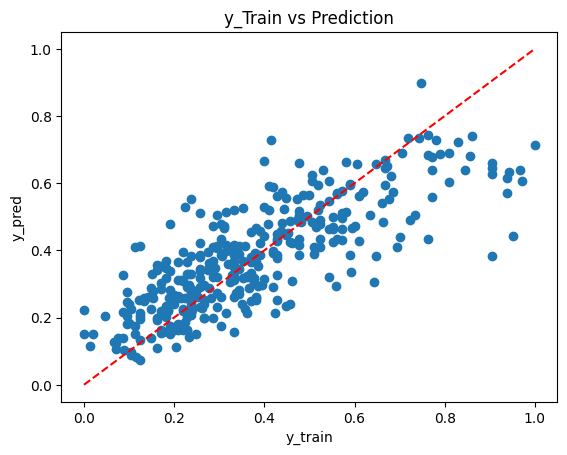

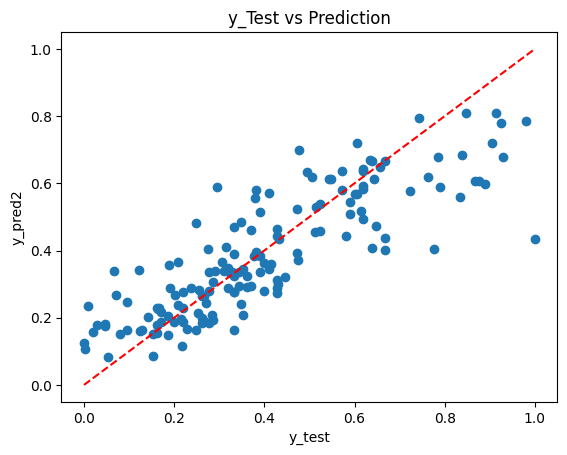

In [542]:
plt.scatter(y_train,y_pred)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.title('y_Train vs Prediction')         
plt.xlabel('y_train')                       
plt.ylabel('y_pred')                       
plt.show()
print("\n")

plt.scatter(y_test,y_pred2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.title('y_Test vs Prediction')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred2')                       
plt.show()

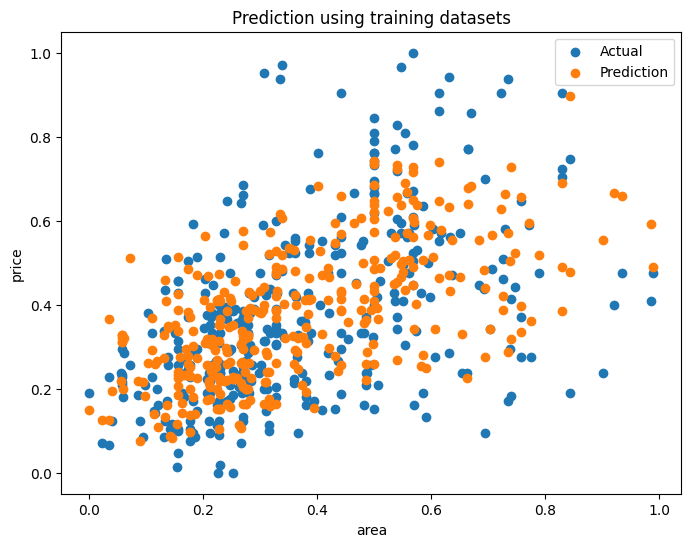

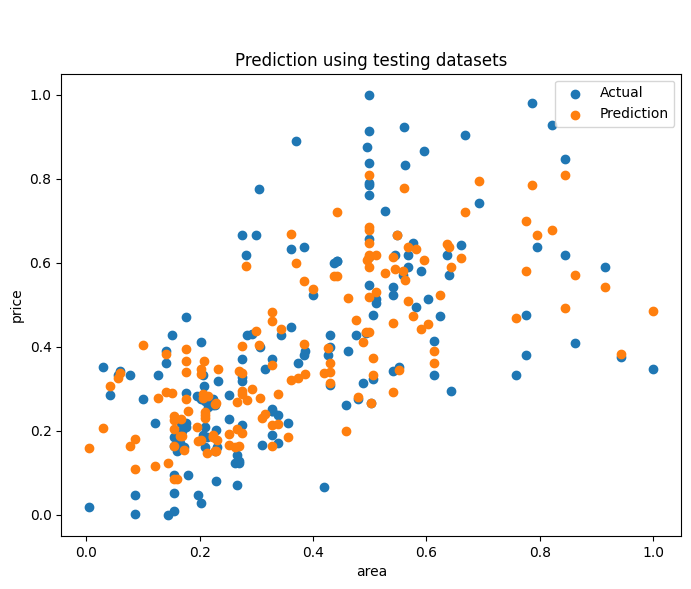

In [543]:
# Actual vs Prediction Scatter Plot
plt.figure(figsize=[8,6])
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= x_train['area'], label='Actual')
plt.scatter(y=y_pred, x= x_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.title('\n\nPrediction using testing datasets')
plt.scatter(y= y_test, x= x_test['area'], label='Actual')
plt.scatter(y= y_pred2, x= x_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()



Ridge Regression (L2 Regularization)

In [544]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
params = {'alpha': [0.00001,0.0001,0.001,0.01, 0.1, 1, 10,100]}

# Create the linear regression model with Ridge regularization
L2 = Ridge()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(L2, params, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the model
best_params = grid_search.best_params_
L2.set_params(**best_params).fit(x_train, y_train)

# Evaluate the model on the test set and train set
y_pred = L2.predict(x_train)
y_pred2 = L2.predict(x_test)


In [545]:
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - y_pred))
r2 = r2_score(y_train, y_pred)
rss = np.sum(np.square(y_train-y_pred))

print(f'\nBest hyperparameters:',best_params)
print( '{} \033[1mTraining Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on training set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on training set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on training set     :',round(mae,15) )
print('R2-Score on training set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on training set :',round(rss,15) )

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred2))
r2 = r2_score(y_test, y_pred2)
rss = np.sum(np.square(y_test-y_pred2))

print( '{} \033[1mTesting Set Metrics\033[0m {}'.format(' '*24, ' '*24) )
print('Mean Squared Error (MSE) on testing set      :',round(mse,15) )
print('Root Mean Squared Error (RMSE) on testing set:',round(rmse,15) )
print('Mean Absolute Error (MAE) on testing set     :',round(mae,15) )
print('R2-Score on testing set                      :',round(r2,15) )
print('Residual Sum of Squares (RSS) on testing set :',round(rss,15) )
print()



Best hyperparameters: {'alpha': 1}
                         Training Set Metrics                         
Mean Squared Error (MSE) on training set      : 0.015949810902567
Root Mean Squared Error (RMSE) on training set: 0.126292560757024
Mean Absolute Error (MAE) on training set     : 0.095280151260816
R2-Score on training set                      : 0.633305077977687
Residual Sum of Squares (RSS) on training set : 5.757881735826563
                         Testing Set Metrics                         
Mean Squared Error (MSE) on testing set      : 0.01597843412925
Root Mean Squared Error (RMSE) on testing set: 0.126405831072976
Mean Absolute Error (MAE) on testing set     : 0.094430920082005
R2-Score on testing set                      : 0.707597732853729
Residual Sum of Squares (RSS) on testing set : 2.492635724162949



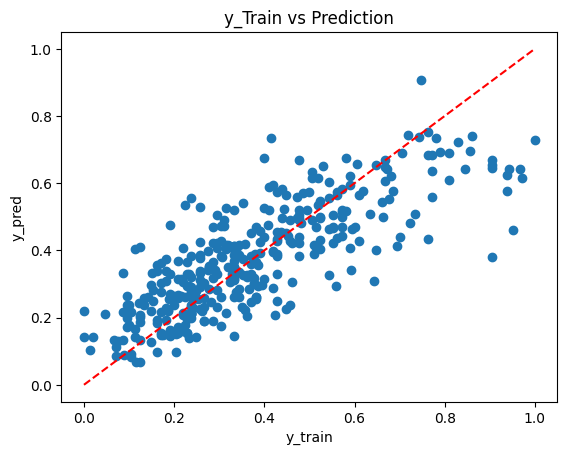

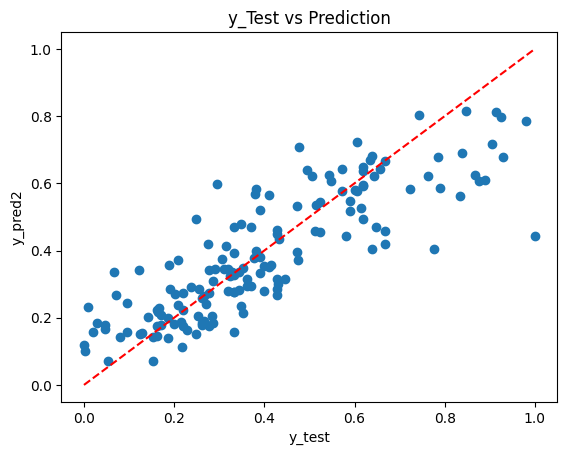

In [546]:
plt.scatter(y_train,y_pred)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.title('y_Train vs Prediction')         
plt.xlabel('y_train')                       
plt.ylabel('y_pred')                       
plt.show()
print("\n")

plt.scatter(y_test,y_pred2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.title('y_Test vs Prediction')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred2')                       
plt.show()

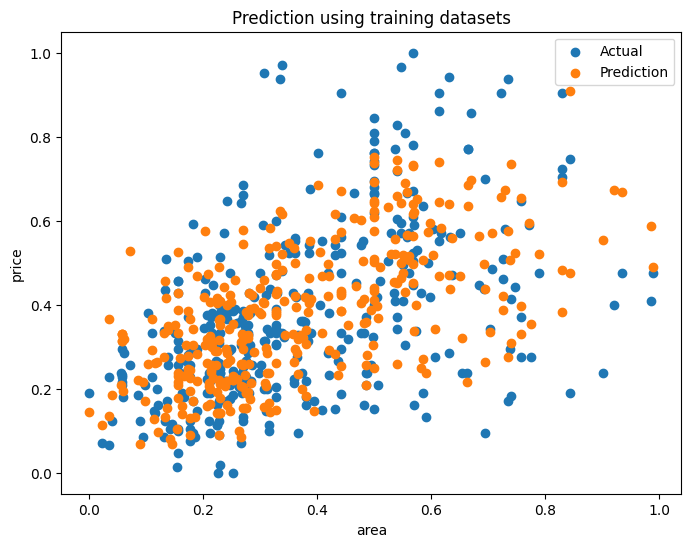

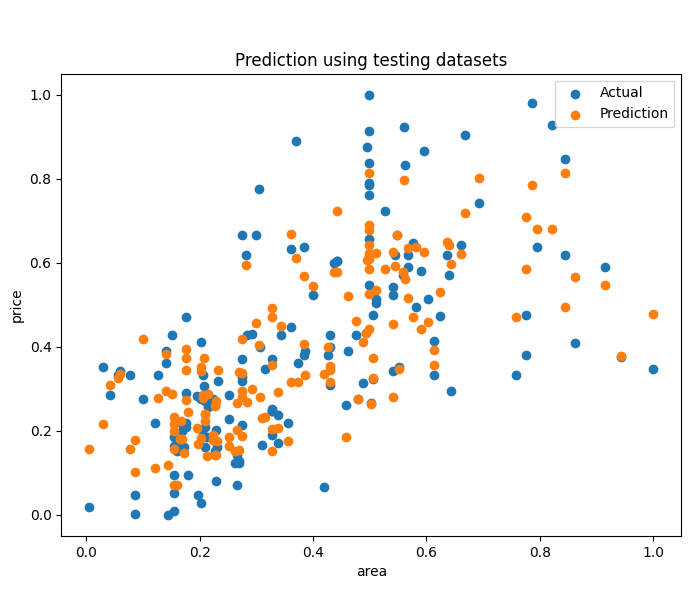

In [547]:
# Actual vs Prediction Scatter Plot
plt.figure(figsize=[8,6])
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= x_train['area'], label='Actual')
plt.scatter(y=y_pred, x= x_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price') 
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.title('\n\nPrediction using testing datasets')
plt.scatter(y= y_test, x= x_test['area'], label='Actual')
plt.scatter(y= y_pred2, x= x_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price') 
plt.legend()
plt.show()


Learning curve

L1 Regularization

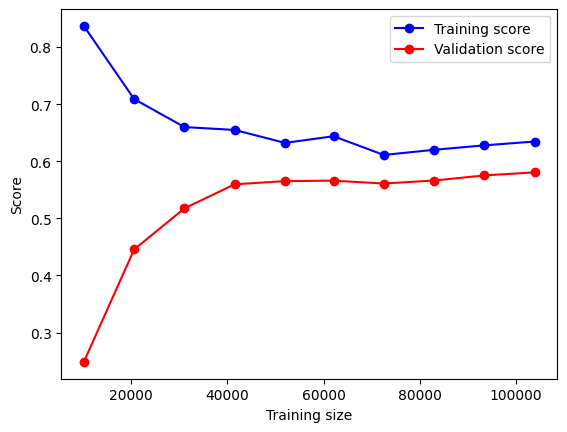

In [548]:
train_sizes, train_scores, test_scores = learning_curve(estimator=L1, X=x_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_sizes_abs = np.round(train_sizes * len(x_train))

plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), 'bo-', label='Training score')
plt.plot(train_sizes_abs, np.mean(test_scores, axis=1), 'ro-', label='Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

L2 Regularization

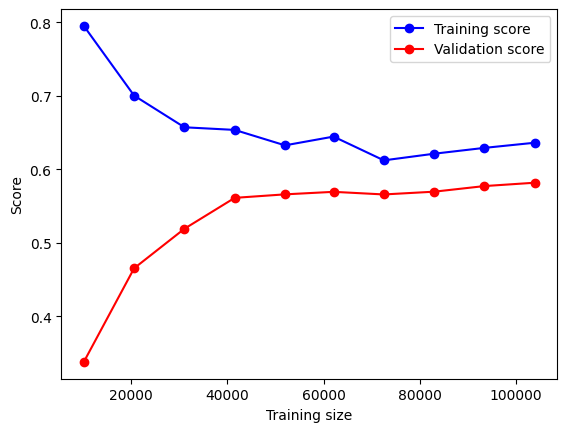

In [549]:
train_sizes, train_scores, test_scores = learning_curve(estimator=L2, X=x_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_sizes_abs = np.round(train_sizes * len(x_train))

plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), 'bo-', label='Training score')
plt.plot(train_sizes_abs, np.mean(test_scores, axis=1), 'ro-', label='Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()